C:\Users\Aaron\AppData\Local\Temp\ipykernel_13224\832557424.py:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  entropy_data = np.array([float(L[0].results) for L in results])
C:\Users\Aaron\AppData\Local\Temp\ipykernel_13224\832557424.py:47: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  bond_data = np.array([float(L[1].results) for L in results])
C:\Users\Aaron\AppData\Local\Temp\ipykernel_13224\832557424.py:35: RuntimeWarning: overflow encountered in exp
  return a * (1 - np.exp(-b * L)) + c
C:\Users\Aaron\AppData\Local\Temp\ipykernel_13224\832557424.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layou

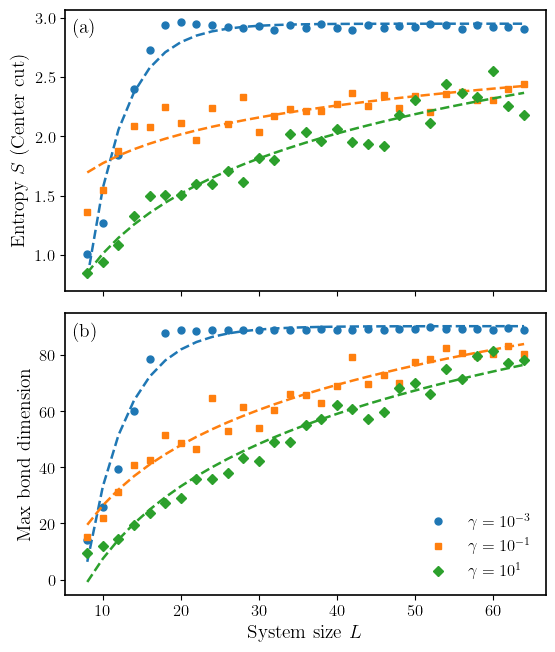

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.optimize import curve_fit

# --- Figure style for Nature Physics ---
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": 14,
    "font.size": 13,
    "axes.titlesize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "axes.linewidth": 1.2,
    "lines.markersize": 5,
    "legend.fontsize": 12,
    "figure.figsize": (6.2, 7.6),
    "xtick.direction": "out",
    "ytick.direction": "out"
})

# --- Gamma values and plot setup ---
gammas = [1e-3, 1e-1, 1e1]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, orange, green
markers = ['o', 's', 'D']  # Circle, square, diamond
L_list = np.array(range(8, 66, 2))

# --- Fit models ---
def log_fit(L, a, b):
    return a * np.log(L) + b

def saturating_exp(L, a, b, c):
    return a * (1 - np.exp(-b * L)) + c

# --- Create subplots (2 rows, 1 column) ---
fig, axes = plt.subplots(2, 1, sharex=True, gridspec_kw={'hspace': 0.08})

# --- Plotting loop ---
for j, gamma in enumerate(gammas):
    filename = f"scaling_{j}.pickle"
    with open(filename, 'rb') as f:
        results = pickle.load(f)

    entropy_data = np.array([float(L[0].results) for L in results])
    bond_data = np.array([float(L[1].results) for L in results])

    # === Panel (a): Runtime cost ===
    axes[0].plot(L_list, entropy_data, linestyle='None', marker=markers[j],
                 color=colors[j], label=fr"$\gamma = 10^{{{int(np.log10(gamma))}}}$")
    try:
        if gamma == 1e-3:
            popt, _ = curve_fit(saturating_exp, L_list, entropy_data, p0=(1.0, 0.1, 1.0))
            axes[0].plot(L_list, saturating_exp(L_list, *popt), '--', color=colors[j], linewidth=1.8)
        else:
            popt, _ = curve_fit(log_fit, L_list, entropy_data)
            axes[0].plot(L_list, log_fit(L_list, *popt), '--', color=colors[j], linewidth=1.8)
    except RuntimeError:
        print(f"Entropy fit failed for gamma = {gamma}")

    # === Panel (b): Max bond dimension ===
    axes[1].plot(L_list, bond_data, linestyle='None', marker=markers[j],
                 color=colors[j], label=fr"$\gamma = 10^{{{int(np.log10(gamma))}}}$")
    try:
        if gamma == 1e-3:
            popt, _ = curve_fit(saturating_exp, L_list, bond_data, p0=(1.0, 0.1, 1.0))
            axes[1].plot(L_list, saturating_exp(L_list, *popt), '--', color=colors[j], linewidth=1.8)
        else:
            popt, _ = curve_fit(log_fit, L_list, bond_data)
            axes[1].plot(L_list, log_fit(L_list, *popt), '--', color=colors[j], linewidth=1.8)
    except RuntimeError:
        print(f"Bond fit failed for gamma = {gamma}")

# --- Labels and annotations ---
axes[0].set_ylabel(r"Entropy $S$ (Center cut)")
axes[1].set_ylabel(r"Max bond dimension")
axes[1].set_xlabel(r"System size $L$")

# axes[0].legend(loc='lower right', frameon=False)
axes[1].legend(loc='lower right', frameon=False)

# --- Add subplot labels (a), (b) ---
axes[0].text(0.015, 0.97, "(a)", transform=axes[0].transAxes, fontsize=14, fontweight='bold', va='top')
axes[1].text(0.015, 0.97, "(b)", transform=axes[1].transAxes, fontsize=14, fontweight='bold', va='top')

# --- Final layout ---
plt.tight_layout()
plt.savefig("results.pdf", bbox_inches="tight")
plt.show()
